#### Cho bộ dữ liệu

X = [1, 2, 3, 4]
Y = [2, 1, 1, 3]

#### Hồi quy tuyến tính

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X = np.array([[1],
              [2],
              [3],
              [4]])

Y = np.array([[2],
              [1],
              [1],
              [3]])

In [4]:
W1 = np.random.rand(1, 3)
W1

array([[0.65894739, 0.11218991, 0.55412534]])

In [5]:
b1 = np.random.rand(3, 1)
b1

array([[0.6911227],
       [0.1021267],
       [0.8869083]])

In [6]:

W2 = np.random.rand(3, 4)
W2

array([[0.12227372, 0.07930451, 0.48050076, 0.18117441],
       [0.59857421, 0.05052176, 0.56401149, 0.92794398],
       [0.11189922, 0.00100092, 0.04702587, 0.03521982]])

In [7]:
b2 = np.random.rand(4, 1)
b2

array([[0.19723235],
       [0.65051293],
       [0.64115991],
       [0.80856749]])

In [8]:
W3 = np.random.rand(4, 1)
W3

array([[0.39627224],
       [0.82556283],
       [0.31350998],
       [0.5754293 ]])

In [9]:
b3 = np.random.rand(4, 1)
b3

array([[0.72883289],
       [0.87984075],
       [0.01761983],
       [0.12121986]])

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [12]:
iter = 1000
tolerance = 1e-5
learning_rate = 0.1
step = 0
history = []

In [ ]:
X = np.array([[1],
              [2],
              [3],
              [4]])

Y = np.array([[2],
              [1],
              [1],
              [3]])

W1 = np.random.rand(1, 3)
b1 = np.random.rand(3, 1)
W2 = nb2 = np.random.rand(4, 1)
b2 = np.random.rand(4, 1)
W3 = np.random.rand(4, 1)
b3 = np.random.rand(4, 1)

while True:
    step += 1

    # Lan truyền tiến
    Z1 = X.dot(W1) + b1.T
    H1 = sigmoid(Z1)
    Z2 = H1.dot(W2) + b2.T
    H2 = sigmoid(Z2)
    Y_pred = H2.dot(W3) + b3.T
    J = np.linalg.norm(Y_pred - Y)**2 / len(Y)

    history.append(J)

    # Lan truyền ngược
    gradient_J_Y_pred = 2/len(Y) * (Y_pred - Y)

    gradient_J_H2 = gradient_J_Y_pred.dot(W3)
    gradient_J_W3 = H2.T.dot(gradient_J_H2)
    gradient_J_b3 = gradient_J_W3.T.dot(np.ones(shape=(len(Y), 1)))

    gradient_J_Z2 = gradient_J_H2 * sigmoid_derivative(Z2)
    gradient_J_H1 = gradient_J_Z2.dot(W2.T)
    gradient_J_W2 = H1.T.dot(gradient_J_Z2)
    gradient_J_b2 = gradient_J_Z2.T.dot(np.ones(shape=(len(Y), 1)))

    gradient_J_Z1 = gradient_J_H1 * sigmoid_derivative(Z1)
    gradient_J_W1 = X.T.dot(gradient_J_Z1)
    gradient_J_b1 = gradient_J_Z1.T.dot(np.ones(shape=(len(Y), 1)))


    W1 = W1 - learning_rate * gradient_J_W1
    b1 = b1 - learning_rate * gradient_J_b1

    W2 = W2 - learning_rate * gradient_J_W2
    b2 = b2 - learning_rate * gradient_J_b2

    W3 = W3 - learning_rate * gradient_J_W3
    b3 = b3 - learning_rate * gradient_J_b3

    if np.linalg.norm(gradient_J_W1) < tolerance and \
        np.linalg.norm(gradient_J_b1) < tolerance and \
        np.linalg.norm(gradient_J_W2) < tolerance and \
        np.linalg.norm(gradient_J_b2) < tolerance and \
        np.linalg.norm(gradient_J_W3) < tolerance and \
        np.linalg.norm(gradient_J_b3) < tolerance or \
        step >= iter:
        break



In [16]:
history

[np.float64(3.531803825141964),
 np.float64(4.303047963994701),
 np.float64(3.4855147069764123),
 np.float64(4.168784378652624),
 np.float64(3.4593298706642868),
 np.float64(4.092640646107952),
 np.float64(3.4440609614990865),
 np.float64(4.0483120497761504),
 np.float64(3.4355890360135017),
 np.float64(4.023961767434535),
 np.float64(3.431785175679471),
 np.float64(4.013404652353161),
 np.float64(3.4314385435902413),
 np.float64(4.013065207890855),
 np.float64(3.4338075326268824),
 np.float64(4.020709365699575),
 np.float64(3.4384066240270617),
 np.float64(4.03484329341194),
 np.float64(3.444895508648256),
 np.float64(4.054400670683747),
 np.float64(3.4530175524447935),
 np.float64(4.078568880058804),
 np.float64(3.462564345350416),
 np.float64(4.106688448492946),
 np.float64(3.4733552255250655),
 np.float64(4.1381943727997035),
 np.float64(3.4852260305428033),
 np.float64(4.172583109167127),
 np.float64(3.498023797222714),
 np.float64(4.209396026599771),
 np.float64(3.511605298655493

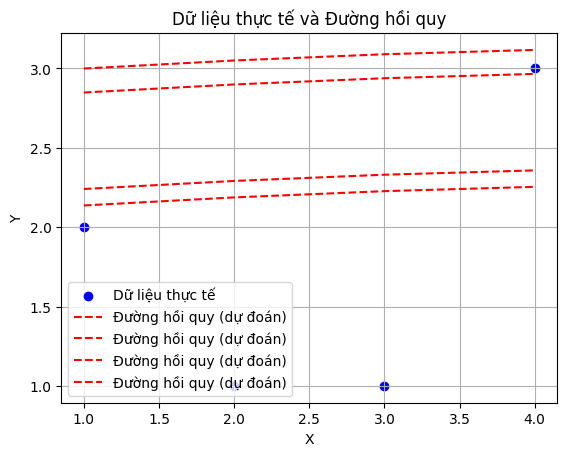

In [29]:
Z1 = X.dot(W1) + b1.T
H1 = sigmoid(Z1)
Z2 = H1.dot(W2) + b2.T
H2 = sigmoid(Z2)
Y_pred = H2.dot(W3) + b3.T

Y_pred

# Vẽ đồ thị dữ liệu thực tế và đường hồi quy
plt.scatter(X, Y, color='blue', label='Dữ liệu thực tế')  # Dữ liệu thực tế
plt.plot(X, Y_pred, color='red', label='Đường hồi quy (dự đoán)', linestyle='--')  # Đường hồi quy
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dữ liệu thực tế và Đường hồi quy')
plt.legend()
plt.grid(True)
plt.show()